In [2]:
import sys
sys.version

'2.7.12 (default, Nov 12 2018, 14:36:49) \n[GCC 5.4.0 20160609]'

# Data Process

In [3]:
#import pyrealsense2 as rs
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import joblib
#import scipy.misc
import tensorflow as tf
#from skimage.restoration import denoise_tv_chambolle
from tensorboardX import SummaryWriter

In [27]:
pp_path = '/home/obin/t2b_dataset/pickandplace/temp/'
data_list = np.sort([pp_path+'/'+x for x in os.listdir(os.path.join(pp_path,''))])
pp_path = '/home/obin/t2b_dataset/pickandplace/temp/0202'
data_list2 = np.sort([pp_path+'/'+x for x in os.listdir(os.path.join(pp_path,''))])
data_list = np.hstack((data_list[0:-1],data_list2))
num_data = len(data_list)
print('num of data : ', num_data)

('num of data : ', 35)


In [7]:
def pretty_print_input(arr, ori = False):
    arr = np.squeeze(arr)
    if ori == True : 
        s_x, s_y, s_d, s_ori = arr[0:4]
        g_x, g_y, g_d, g_ori = arr[4:8]
        
        print('start pixel        goal pixek')
        print('x : %04f    x : %04f'%(s_x,g_x))
        print('y : %04f    y : %04f'%(s_y,g_y))
        print('z : %04f    z : %04f'%(s_d,g_d))
        print('o : %04f    o : %04f'%(s_ori,g_ori))
        print('\n')
    else : 
        s_x, s_y, s_d = arr[0:3]
        g_x, g_y, g_d = arr[3:6]
        
        print('start pixel        goal pixek')
        print('x : %04f    x : %04f'%(s_x,g_x))
        print('y : %04f    y : %04f'%(s_y,g_y))
        print('z : %04f    z : %04f'%(s_d,g_d))
        print('\n')
    
    
def pretty_print_out(arr):
    arr = np.squeeze(arr)
    s_px, s_py, s_pz, s_ox, s_oy, s_oz, s_ow = arr[0:7]
    g_px, g_py, g_pz, g_ox, g_oy, g_oz, g_ow = arr[7:14]
    
    print('start pose        goal pose')
    print('x : %04f    x : %04f'%(s_px,g_px))
    print('y : %04f    y : %04f'%(s_py,g_py))
    print('z : %04f    z : %04f'%(s_pz,g_pz))
    print('x : %04f    x : %04f'%(s_ox,g_ox))
    print('y : %04f    y : %04f'%(s_oy,g_oy))
    print('z : %04f    z : %04f'%(s_oz,g_oz))
    print('w : %04f    w : %04f'%(s_ow,g_ow))
    print('\n')
    


## depth image preprocess

In [28]:
#np.random.shuffle(data_list)
data_list

array(['/home/obin/t2b_dataset/pickandplace/temp//0015.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0018.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0020.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0021.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0022.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0023.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0024.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0025.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0026.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0027.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0036.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0038.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0039.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0059.dat.gz',
       '/home/obin/t2b_dataset/pickandplace/temp//0068.dat.gz',
       '/home/obin/t2b_dataset/pickandpl

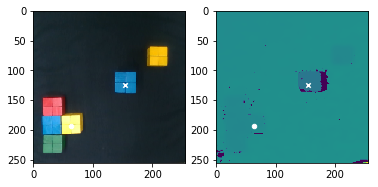

start pixel        goal pixek
x : 63.000000    x : 154.000000
y : 193.000000    y : 125.000000
z : 683.000000    z : 578.000000


start pose        goal pose
x : 0.843169    x : 0.730905
y : -0.093302    y : 0.047215
z : -0.194525    z : -0.037717
x : 0.728686    x : 0.010015
y : -0.677066    y : 0.995165
z : -0.007405    z : -0.041275
w : -0.102683    w : 0.088556


start pix : (63,193,683.0) -> goal pix : (154,125,578.0)
/home/obin/t2b_dataset/pickandplace/data/0059.dat.gz
pick orientation 2- pass or not : 9
place orienation 0- pass or not : 0


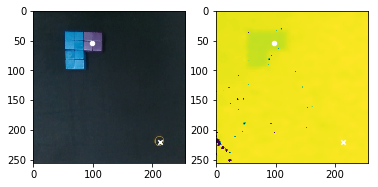

start pixel        goal pixek
x : 98.000000    x : 213.000000
y : 54.000000    y : 221.000000
z : 673.000000    z : 730.830627


start pose        goal pose
x : 0.582768    x : 0.876452
y : -0.040798    y : 0.163852
z : -0.208952    z : -0.196841
x : -0.682408    x : -0.041945
y : 0.730582    y : 0.970851
z : -0.020749    z : 0.009318
w : -0.011789    w : 0.235800


start pix : (98,54,673.0) -> goal pix : (213,221,730.830627441)
/home/obin/t2b_dataset/pickandplace/0202/data/0026.dat.gz
pick orientation 2- pass or not : 2
place orienation 0- pass or not : 0


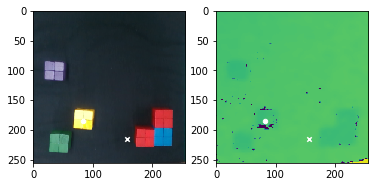

start pixel        goal pixek
x : 83.000000    x : 157.000000
y : 185.000000    y : 215.000000
z : 690.851562    z : 730.000000


start pose        goal pose
x : 0.824519    x : 0.878387
y : -0.047336    y : 0.081893
z : -0.208017    z : -0.198089
x : 0.015503    x : -0.691498
y : 0.992543    y : 0.702278
z : -0.022402    z : 0.016747
w : 0.118807    w : 0.168393


start pix : (83,185,690.8515625) -> goal pix : (157,215,730.0)
/home/obin/t2b_dataset/pickandplace/data/0069.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 2


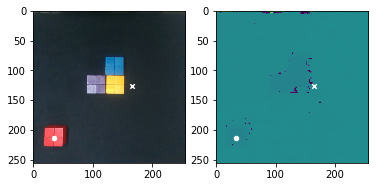

start pixel        goal pixek
x : 34.000000    x : 165.000000
y : 213.000000    y : 127.000000
z : 678.289062    z : 725.164063


start pose        goal pose
x : 0.858680    x : 0.700920
y : -0.143906    y : 0.097590
z : -0.210443    z : -0.201623
x : 0.001293    x : -0.680745
y : 0.984561    y : 0.714391
z : -0.012703    z : 0.144015
w : 0.174573    w : 0.074101


start pix : (34,213,678.2890625) -> goal pix : (165,127,725.1640625)
/home/obin/t2b_dataset/pickandplace/0202/data/0032.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 2


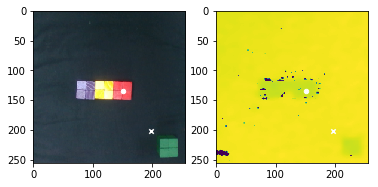

start pixel        goal pixek
x : 151.000000    x : 197.000000
y : 134.000000    y : 202.000000
z : 676.000000    z : 724.000000


start pose        goal pose
x : 0.734018    x : 0.853816
y : 0.046335    y : 0.120815
z : -0.191677    z : -0.186401
x : -0.657599    x : -0.022168
y : 0.751055    y : 0.987562
z : 0.049411    z : 0.027044
w : 0.032239    w : 0.153293


start pix : (151,134,676.0) -> goal pix : (197,202,724.0)
/home/obin/t2b_dataset/pickandplace/data/0120.dat.gz
pick orientation 2- pass or not : 2
place orienation 0- pass or not : 0


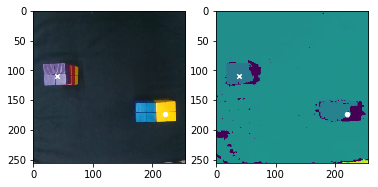

start pixel        goal pixek
x : 221.000000    x : 39.000000
y : 173.000000    y : 110.000000
z : 635.000000    z : 571.000000


start pose        goal pose
x : 0.820672    x : 0.716168
y : 0.154367    y : -0.124017
z : -0.158024    z : -0.053951
x : 0.715560    x : -0.005434
y : -0.687435    y : 0.994573
z : -0.008312    z : -0.048799
w : -0.123845    w : 0.091727


start pix : (221,173,635.0) -> goal pix : (39,110,571.0)
/home/obin/t2b_dataset/pickandplace/data/0163.dat.gz
pick orientation 2- pass or not : 9
place orienation 0- pass or not : 0


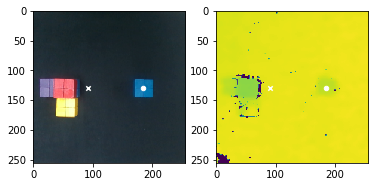

start pixel        goal pixek
x : 185.000000    x : 91.000000
y : 130.000000    y : 130.000000
z : 678.000000    z : 722.320312


start pose        goal pose
x : 0.729793    x : 0.718626
y : 0.120694    y : -0.036009
z : -0.204334    z : -0.181660
x : -0.004238    x : 0.715078
y : 0.992858    y : -0.689720
z : -0.002570    z : -0.088120
w : 0.119196    w : -0.072010


start pix : (185,130,678.0) -> goal pix : (91,130,722.3203125)
/home/obin/t2b_dataset/pickandplace/0202/data/0033.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 9


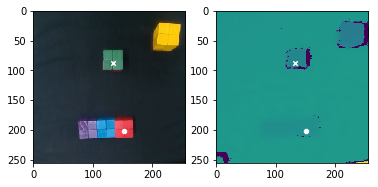

start pixel        goal pixek
x : 152.000000    x : 133.000000
y : 202.000000    y : 87.000000
z : 681.132812    z : 625.335938


start pose        goal pose
x : 0.863589    x : 0.667652
y : 0.048685    y : 0.012083
z : -0.199494    z : -0.089874
x : 0.717629    x : 0.019214
y : -0.686649    y : 0.991784
z : 0.037138    z : -0.059260
w : -0.110192    w : 0.111727


start pix : (152,202,681.1328125) -> goal pix : (133,87,625.3359375)
/home/obin/t2b_dataset/pickandplace/data/0038.dat.gz
pick orientation 2- pass or not : 9
place orienation 0- pass or not : 0


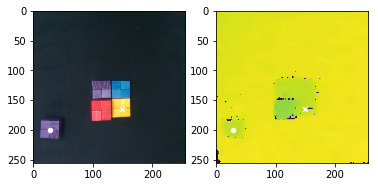

start pixel        goal pixek
x : 28.000000    x : 149.000000
y : 200.000000    y : 165.000000
z : 675.101013    z : 681.414062


start pose        goal pose
x : 0.863013    x : 0.786054
y : -0.152900    y : 0.065957
z : -0.207966    z : -0.153834
x : -0.006984    x : 0.737676
y : 0.982973    y : -0.662113
z : -0.021099    z : -0.071851
w : 0.182399    w : -0.110808


start pix : (28,200,675.101013184) -> goal pix : (149,165,681.4140625)
/home/obin/t2b_dataset/pickandplace/data/0021.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 9


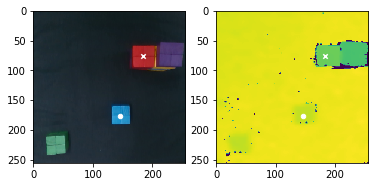

start pixel        goal pixek
x : 146.000000    x : 184.000000
y : 177.000000    y : 76.000000
z : 676.000000    z : 577.000000


start pose        goal pose
x : 0.813907    x : 0.656975
y : 0.052729    y : 0.105538
z : -0.187568    z : -0.031490
x : -0.020781    x : -0.687425
y : 0.991635    y : 0.714434
z : 0.040584    z : 0.098556
w : 0.120754    w : 0.085541


start pix : (146,177,676.0) -> goal pix : (184,76,577.0)
/home/obin/t2b_dataset/pickandplace/data/0057.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


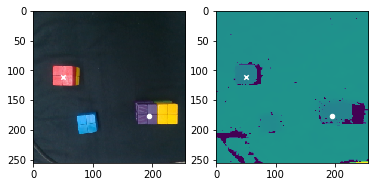

start pixel        goal pixek
x : 195.000000    x : 50.000000
y : 177.000000    y : 112.000000
z : 631.976562    z : 624.460938


start pose        goal pose
x : 0.822088    x : 0.714833
y : 0.106854    y : -0.115775
z : -0.164396    z : -0.108467
x : 0.720398    x : 0.021236
y : -0.686759    y : 0.998630
z : 0.013195    z : -0.017698
w : -0.095994    w : 0.044434


start pix : (195,177,631.9765625) -> goal pix : (50,112,624.4609375)
/home/obin/t2b_dataset/pickandplace/data/0162.dat.gz
pick orientation 2- pass or not : 9
place orienation 0- pass or not : 0


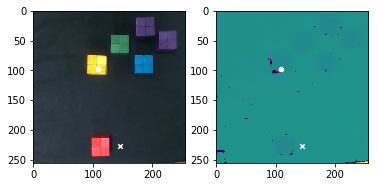

start pixel        goal pixek
x : 109.000000    x : 145.000000
y : 98.000000    y : 228.000000
z : 694.956177    z : 730.320313


start pose        goal pose
x : 0.676514    x : 0.900601
y : -0.015641    y : 0.052155
z : -0.194028    z : -0.184364
x : -0.007130    x : 0.708846
y : 0.998345    y : -0.687053
z : 0.024555    z : 0.039022
w : 0.051520    w : -0.154833


start pix : (109,98,694.956176758) -> goal pix : (145,228,730.3203125)
/home/obin/t2b_dataset/pickandplace/data/0138.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 9


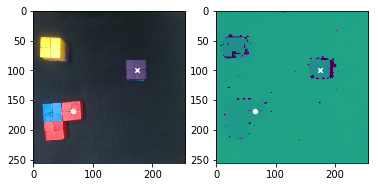

start pixel        goal pixek
x : 66.000000    x : 174.000000
y : 169.000000    y : 100.000000
z : 675.210938    z : 626.320313


start pose        goal pose
x : 0.780862    x : 0.679974
y : -0.093643    y : 0.083646
z : -0.206378    z : -0.097198
x : 0.701278    x : -0.031300
y : 0.710398    y : 0.998686
z : 0.029808    z : -0.034268
w : 0.051527    w : -0.021732


start pix : (66,169,675.2109375) -> goal pix : (174,100,626.3203125)
/home/obin/t2b_dataset/pickandplace/0202/data/0044.dat.gz
pick orientation 2- pass or not : 1
place orienation 0- pass or not : 0


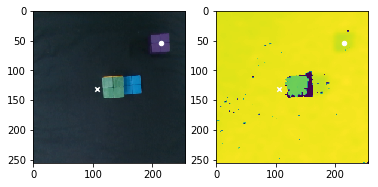

start pixel        goal pixek
x : 215.000000    x : 106.000000
y : 54.000000    y : 131.000000
z : 685.000000    z : 719.000000


start pose        goal pose
x : 0.613919    x : 0.722218
y : 0.164150    y : -0.014985
z : -0.198441    z : -0.191825
x : -0.002492    x : -0.673692
y : 0.994041    y : 0.721782
z : 0.015064    z : 0.093048
w : 0.107934    w : 0.128501


start pix : (215,54,685.0) -> goal pix : (106,131,719.0)
/home/obin/t2b_dataset/pickandplace/data/0077.dat.gz
pick orientation 1- pass or not : 0
place orienation 1- pass or not : 2


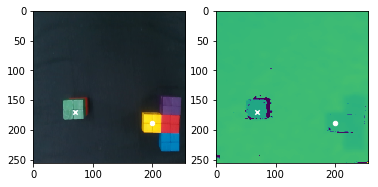

start pixel        goal pixek
x : 200.000000    x : 69.000000
y : 189.000000    y : 170.000000
z : 682.000000    z : 628.000000


start pose        goal pose
x : 0.841219    x : 0.798758
y : 0.138969    y : -0.085460
z : -0.198091    z : -0.088250
x : -0.668675    x : 0.001163
y : 0.721172    y : 0.987497
z : 0.082246    z : -0.033863
w : 0.161307    w : 0.153952


start pix : (200,189,682.0) -> goal pix : (69,170,628.0)
/home/obin/t2b_dataset/pickandplace/data/0035.dat.gz
pick orientation 1- pass or not : 2
place orienation 0- pass or not : 0


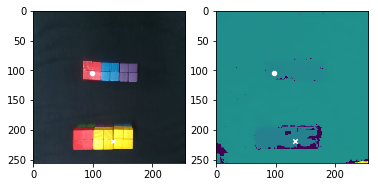

start pixel        goal pixek
x : 98.000000    x : 133.000000
y : 104.000000    y : 219.000000
z : 672.000000    z : 633.000000


start pose        goal pose
x : 0.692184    x : 0.882377
y : -0.034386    y : 0.021019
z : -0.199246    z : -0.092005
x : -0.680558    x : 0.017782
y : 0.719408    y : 0.989149
z : 0.109124    z : -0.010188
w : 0.085937    w : 0.145482


start pix : (98,104,672.0) -> goal pix : (133,219,633.0)
/home/obin/t2b_dataset/pickandplace/data/0040.dat.gz
pick orientation 1- pass or not : 2
place orienation 0- pass or not : 0


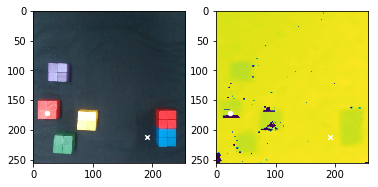

start pixel        goal pixek
x : 23.000000    x : 191.000000
y : 171.000000    y : 212.000000
z : 685.382812    z : 726.929688


start pose        goal pose
x : 0.798591    x : 0.882886
y : -0.155507    y : 0.133524
z : -0.195085    z : -0.178428
x : 0.000537    x : 0.719476
y : 0.990818    y : -0.659208
z : -0.026791    z : -0.003892
w : 0.132523    w : -0.218597


start pix : (23,171,685.3828125) -> goal pix : (191,212,726.9296875)
/home/obin/t2b_dataset/pickandplace/data/0068.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 9


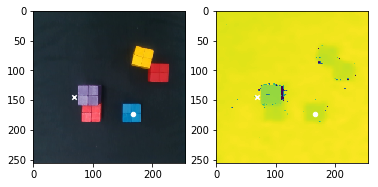

start pixel        goal pixek
x : 167.000000    x : 68.000000
y : 174.000000    y : 144.000000
z : 676.000000    z : 720.000000


start pose        goal pose
x : 0.821324    x : 0.751731
y : 0.076273    y : -0.069301
z : -0.202951    z : -0.194926
x : -0.037850    x : 0.704499
y : 0.984355    y : -0.690126
z : -0.005481    z : -0.093702
w : 0.171997    w : -0.136482


start pix : (167,174,676.0) -> goal pix : (68,144,720.0)
/home/obin/t2b_dataset/pickandplace/data/0018.dat.gz
pick orientation 2- pass or not : 0
place orienation 2- pass or not : 9


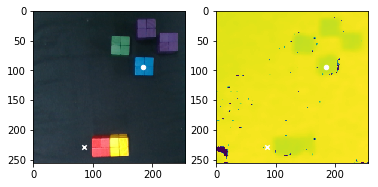

start pixel        goal pixek
x : 185.000000    x : 85.000000
y : 94.000000    y : 229.000000
z : 679.000000    z : 725.164062


start pose        goal pose
x : 0.675131    x : 0.889591
y : 0.116575    y : -0.057213
z : -0.193426    z : -0.185388
x : -0.023814    x : -0.677261
y : 0.996298    y : 0.723483
z : 0.054202    z : -0.043870
w : 0.062339    w : 0.126357


start pix : (185,94,679.0) -> goal pix : (85,229,725.1640625)
/home/obin/t2b_dataset/pickandplace/data/0139.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


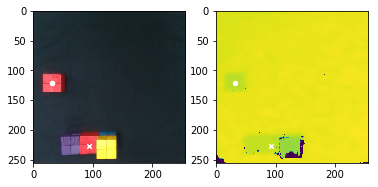

start pixel        goal pixek
x : 31.000000    x : 93.000000
y : 122.000000    y : 228.000000
z : 675.664062    z : 681.679687


start pose        goal pose
x : 0.724972    x : 0.893149
y : -0.154949    y : -0.046129
z : -0.215562    z : -0.157082
x : -0.016945    x : 0.710048
y : 0.992147    y : -0.690310
z : -0.023614    z : -0.001365
w : 0.121655    w : -0.138931


start pix : (31,122,675.6640625) -> goal pix : (93,228,681.6796875)
/home/obin/t2b_dataset/pickandplace/data/0020.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 9


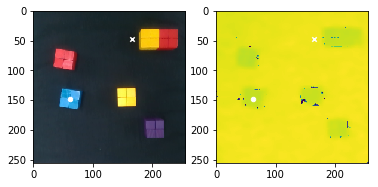

start pixel        goal pixek
x : 62.000000    x : 165.000000
y : 149.000000    y : 48.000000
z : 673.000000    z : 725.000000


start pose        goal pose
x : 0.767468    x : 0.594028
y : -0.103539    y : 0.087907
z : -0.203177    z : -0.193014
x : 0.053263    x : -0.675424
y : 0.988025    y : 0.717066
z : -0.022545    z : 0.053302
w : 0.143044    w : 0.163639


start pix : (62,149,673.0) -> goal pix : (165,48,725.0)
/home/obin/t2b_dataset/pickandplace/data/0028.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


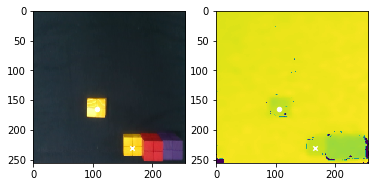

start pixel        goal pixek
x : 106.000000    x : 166.000000
y : 165.000000    y : 231.000000
z : 680.164062    z : 684.000000


start pose        goal pose
x : 0.796517    x : 0.896881
y : -0.027188    y : 0.082341
z : -0.191278    z : -0.128452
x : -0.053403    x : 0.731358
y : 0.986282    y : -0.662117
z : -0.021485    z : -0.009893
w : 0.154706    w : -0.163156


start pix : (106,165,680.1640625) -> goal pix : (166,231,684.0)
/home/obin/t2b_dataset/pickandplace/data/0022.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 9


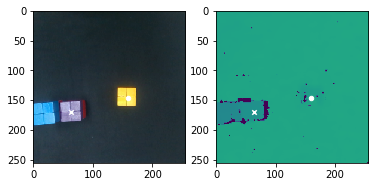

start pixel        goal pixek
x : 159.000000    x : 63.000000
y : 147.000000    y : 170.000000
z : 715.226562    z : 630.000000


start pose        goal pose
x : 0.759816    x : 0.772650
y : 0.052225    y : -0.081221
z : -0.206643    z : -0.106008
x : -0.015734    x : 0.745193
y : 0.992531    y : -0.660364
z : -0.019955    z : -0.066066
w : 0.119318    w : -0.065129


start pix : (159,147,715.2265625) -> goal pix : (63,170,630.0)
/home/obin/t2b_dataset/pickandplace/0202/data/0041.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 9


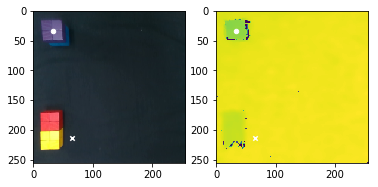

start pixel        goal pixek
x : 33.000000    x : 65.000000
y : 33.000000    y : 213.000000
z : 620.000000    z : 728.585938


start pose        goal pose
x : 0.580937    x : 0.874357
y : -0.137215    y : -0.105462
z : -0.157405    z : -0.192737
x : 0.015792    x : 0.716945
y : 0.998547    y : -0.692031
z : -0.010052    z : 0.035515
w : 0.050527    w : -0.076293


start pix : (33,33,620.0) -> goal pix : (65,213,728.5859375)
/home/obin/t2b_dataset/pickandplace/data/0025.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 9


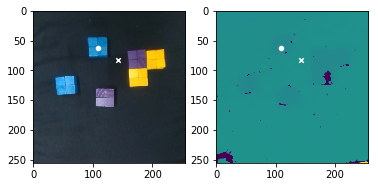

start pixel        goal pixek
x : 109.000000    x : 142.000000
y : 63.000000    y : 83.000000
z : 671.000000    z : 726.000000


start pose        goal pose
x : 0.616544    x : 0.664093
y : -0.032993    y : 0.029498
z : -0.194323    z : -0.190290
x : -0.043258    x : 0.718257
y : 0.997387    y : -0.684651
z : -0.010148    z : 0.054418
w : 0.056973    w : -0.111346


start pix : (109,63,671.0) -> goal pix : (142,83,726.0)
/home/obin/t2b_dataset/pickandplace/data/0145.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 9


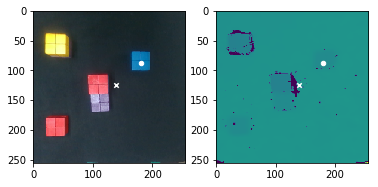

start pixel        goal pixek
x : 180.000000    x : 139.000000
y : 88.000000    y : 124.000000
z : 676.000000    z : 720.000000


start pose        goal pose
x : 0.666269    x : 0.707669
y : 0.095766    y : 0.036386
z : -0.203526    z : -0.211440
x : -0.018277    x : 0.708309
y : 0.996762    y : -0.704450
z : -0.014786    z : 0.026868
w : 0.076890    w : -0.036432


start pix : (180,88,676.0) -> goal pix : (139,124,720.0)
/home/obin/t2b_dataset/pickandplace/0202/data/0047.dat.gz
pick orientation 0- pass or not : 0
place orienation 2- pass or not : 9


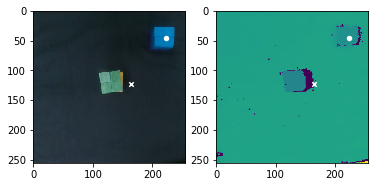

start pixel        goal pixek
x : 223.000000    x : 164.000000
y : 46.000000    y : 123.000000
z : 631.000000    z : 725.000000


start pose        goal pose
x : 0.609000    x : 0.729854
y : 0.159913    y : 0.080530
z : -0.156211    z : -0.183483
x : 0.031282    x : 0.721345
y : 0.996200    y : 0.687770
z : 0.037584    z : 0.005822
w : 0.072070    w : 0.081240


start pix : (223,46,631.0) -> goal pix : (164,123,725.0)
/home/obin/t2b_dataset/pickandplace/data/0076.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 1


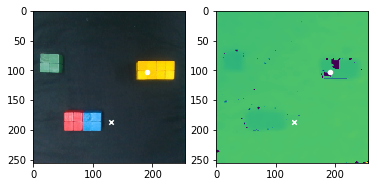

start pixel        goal pixek
x : 191.000000    x : 131.000000
y : 102.000000    y : 187.000000
z : 682.757812    z : 721.820312


start pose        goal pose
x : 0.685486    x : 0.834283
y : 0.125486    y : 0.019552
z : -0.191910    z : -0.190523
x : 0.705948    x : 0.713751
y : -0.704154    y : -0.693040
z : -0.014528    z : -0.005208
w : -0.074790    w : -0.101138


start pix : (191,102,682.7578125) -> goal pix : (131,187,721.8203125)
/home/obin/t2b_dataset/pickandplace/data/0124.dat.gz
pick orientation 1- pass or not : 0
place orienation 1- pass or not : 9


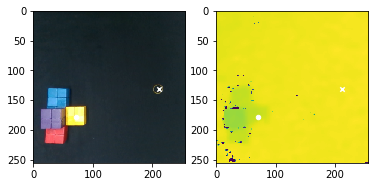

start pixel        goal pixek
x : 71.000000    x : 211.000000
y : 178.000000    y : 131.000000
z : 676.000000    z : 728.695312


start pose        goal pose
x : 0.796795    x : 0.721449
y : -0.080640    y : 0.154136
z : -0.205382    z : -0.202106
x : 0.706776    x : -0.688356
y : -0.706697    y : 0.722047
z : -0.003716    z : 0.051539
w : -0.032134    w : 0.046457


start pix : (71,178,676.0) -> goal pix : (211,131,728.6953125)
/home/obin/t2b_dataset/pickandplace/0202/data/0027.dat.gz
pick orientation 1- pass or not : 9
place orienation 0- pass or not : 2


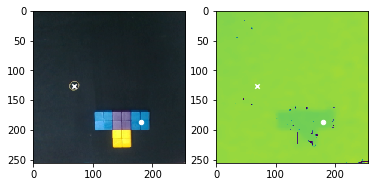

start pixel        goal pixek
x : 180.000000    x : 68.000000
y : 187.000000    y : 126.000000
z : 681.000000    z : 725.000000


start pose        goal pose
x : 0.821805    x : 0.711337
y : 0.109138    y : -0.096601
z : -0.212487    z : -0.205894
x : 0.714374    x : -0.039049
y : -0.691171    y : 0.997055
z : -0.013748    z : -0.022471
w : -0.108459    w : 0.062067


start pix : (180,187,681.0) -> goal pix : (68,126,725.0)
/home/obin/t2b_dataset/pickandplace/0202/data/0024.dat.gz
pick orientation 1- pass or not : 9
place orienation 0- pass or not : 0


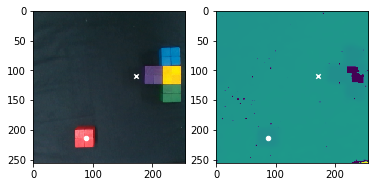

start pixel        goal pixek
x : 88.000000    x : 172.000000
y : 214.000000    y : 109.000000
z : 678.000000    z : 723.000000


start pose        goal pose
x : 0.884548    x : 0.701967
y : -0.059545    y : 0.097401
z : -0.199066    z : -0.191794
x : -0.008133    x : -0.700638
y : 0.993651    y : 0.705680
z : -0.015927    z : 0.068266
w : 0.111072    w : 0.080382


start pix : (88,214,678.0) -> goal pix : (172,109,723.0)
/home/obin/t2b_dataset/pickandplace/data/0114.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


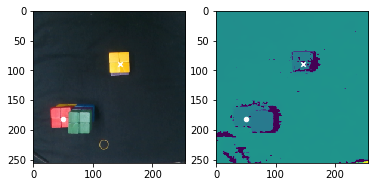

start pixel        goal pixek
x : 50.000000    x : 146.000000
y : 181.000000    y : 89.000000
z : 628.000000    z : 0.000000


start pose        goal pose
x : 0.818060    x : 0.685565
y : -0.119565    y : 0.033840
z : -0.157170    z : -0.099729
x : -0.699624    x : -0.028824
y : 0.708004    y : 0.995750
z : 0.031232    z : 0.006324
w : 0.091004    w : 0.087241


start pix : (50,181,628.0) -> goal pix : (146,89,0.0)
/home/obin/t2b_dataset/pickandplace/data/0165.dat.gz
pick orientation 1- pass or not : 2
place orienation 0- pass or not : 0


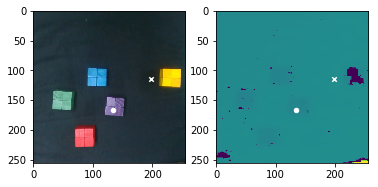

start pixel        goal pixek
x : 134.000000    x : 198.000000
y : 166.000000    y : 115.000000
z : 676.296875    z : 729.000000


start pose        goal pose
x : 0.794985    x : 0.708973
y : 0.031484    y : 0.142986
z : -0.198870    z : -0.179039
x : 0.030533    x : 0.705814
y : 0.992300    y : -0.703236
z : 0.009583    z : -0.054876
w : 0.119655    w : -0.065383


start pix : (134,166,676.296875) -> goal pix : (198,115,729.0)
/home/obin/t2b_dataset/pickandplace/data/0111.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 9


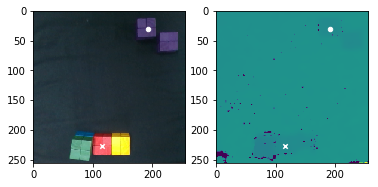

start pixel        goal pixek
x : 192.000000    x : 116.000000
y : 31.000000    y : 228.000000
z : 677.000000    z : 675.817322


start pose        goal pose
x : 0.563113    x : 0.898500
y : 0.108393    y : -0.019065
z : -0.204053    z : -0.147809
x : -0.116357    x : -0.695620
y : 0.992862    y : 0.704407
z : 0.003451    z : -0.066348
w : 0.025962    w : 0.124586


start pix : (192,31,677.0) -> goal pix : (116,228,675.817321777)
/home/obin/t2b_dataset/pickandplace/data/0141.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


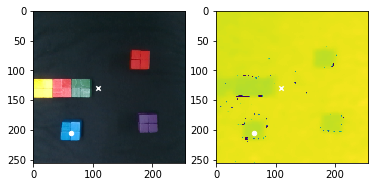

start pixel        goal pixek
x : 63.000000    x : 109.000000
y : 205.000000    y : 130.000000
z : 678.539062    z : 721.000000


start pose        goal pose
x : 0.851543    x : 0.727482
y : -0.095186    y : -0.006704
z : -0.201675    z : -0.197440
x : 0.006800    x : -0.694445
y : 0.988086    y : 0.702705
z : -0.016054    z : 0.062307
w : 0.152912    w : 0.141671


start pix : (63,205,678.5390625) -> goal pix : (109,130,721.0)
/home/obin/t2b_dataset/pickandplace/data/0081.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


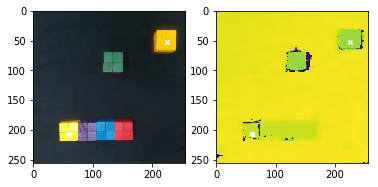

start pixel        goal pixek
x : 60.000000    x : 225.000000
y : 207.000000    y : 52.000000
z : 681.154724    z : 632.000000


start pose        goal pose
x : 0.860954    x : 0.613543
y : -0.104726    y : 0.164980
z : -0.207245    z : -0.093508
x : 0.686913    x : 0.032275
y : 0.721099    y : 0.990831
z : 0.024127    z : 0.083276
w : 0.087097    w : 0.101374


start pix : (60,207,681.154724121) -> goal pix : (225,52,632.0)
/home/obin/t2b_dataset/pickandplace/data/0037.dat.gz
pick orientation 1- pass or not : 1
place orienation 0- pass or not : 0


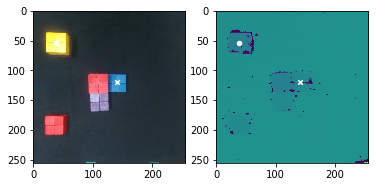

start pixel        goal pixek
x : 38.000000    x : 141.000000
y : 54.000000    y : 120.000000
z : 619.719849    z : 675.539063


start pose        goal pose
x : 0.626248    x : 0.717038
y : -0.127321    y : 0.039322
z : -0.153293    z : -0.145686
x : 0.018193    x : 0.712673
y : 0.995977    y : -0.699641
z : -0.035781    z : -0.012066
w : 0.080114    w : -0.049542


start pix : (38,54,619.719848633) -> goal pix : (141,120,675.5390625)
/home/obin/t2b_dataset/pickandplace/0202/data/0048.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 9


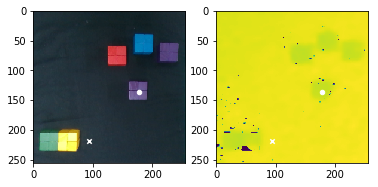

start pixel        goal pixek
x : 178.000000    x : 94.000000
y : 136.000000    y : 218.000000
z : 679.000000    z : 729.646545


start pose        goal pose
x : 0.743209    x : 0.880500
y : 0.103332    y : -0.034562
z : -0.193641    z : -0.188766
x : -0.020832    x : 0.716050
y : 0.993771    y : -0.682375
z : 0.039489    z : -0.021175
w : 0.102103    w : -0.145562


start pix : (178,136,679.0) -> goal pix : (94,218,729.64654541)
/home/obin/t2b_dataset/pickandplace/data/0103.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 9


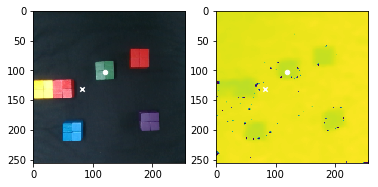

start pixel        goal pixek
x : 120.000000    x : 82.000000
y : 102.000000    y : 131.000000
z : 676.000000    z : 721.011902


start pose        goal pose
x : 0.694958    x : 0.734424
y : 0.003865    y : -0.040594
z : -0.188692    z : -0.178511
x : -0.052555    x : -0.693714
y : 0.990597    y : 0.707244
z : -0.042063    z : 0.069901
w : 0.119104    w : 0.116963


start pix : (120,102,676.0) -> goal pix : (82,131,721.011901855)
/home/obin/t2b_dataset/pickandplace/data/0080.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


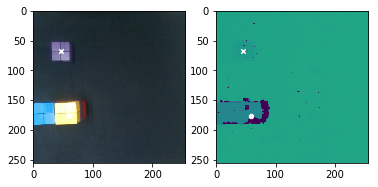

start pixel        goal pixek
x : 59.000000    x : 46.000000
y : 176.000000    y : 68.000000
z : 578.000000    z : 673.000000


start pose        goal pose
x : 0.768745    x : 0.607389
y : -0.096170    y : -0.133553
z : -0.108737    z : -0.158228
x : 0.734574    x : 0.017946
y : -0.678465    y : 0.999659
z : -0.007363    z : -0.017957
w : -0.005687    w : 0.006094


start pix : (59,176,578.0) -> goal pix : (46,68,673.0)
/home/obin/t2b_dataset/pickandplace/0202/data/0042.dat.gz
pick orientation 1- pass or not : 9
place orienation 0- pass or not : 0


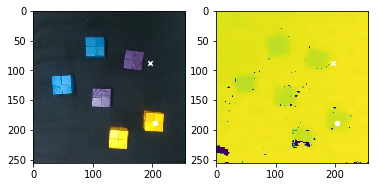

start pixel        goal pixek
x : 204.000000    x : 196.000000
y : 189.000000    y : 87.000000
z : 695.578125    z : 720.179688


start pose        goal pose
x : 0.841207    x : 0.664131
y : 0.151727    y : 0.147939
z : -0.209703    z : -0.206591
x : -0.052232    x : -0.655077
y : 0.983603    y : 0.733554
z : 0.020213    z : 0.101971
w : 0.171428    w : 0.149580


start pix : (204,189,695.578125) -> goal pix : (196,87,720.1796875)
/home/obin/t2b_dataset/pickandplace/data/0143.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


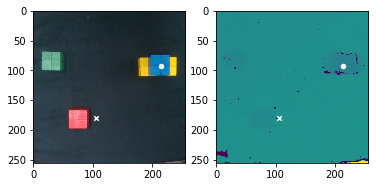

start pixel        goal pixek
x : 214.000000    x : 105.000000
y : 93.000000    y : 180.000000
z : 628.000000    z : 725.000000


start pose        goal pose
x : 0.689036    x : 0.834733
y : 0.141372    y : -0.022102
z : -0.153639    z : -0.197556
x : -0.043504    x : -0.700013
y : 0.997055    y : 0.706683
z : -0.008119    z : 0.039040
w : 0.062636    w : 0.095167


start pix : (214,93,628.0) -> goal pix : (105,180,725.0)
/home/obin/t2b_dataset/pickandplace/data/0123.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


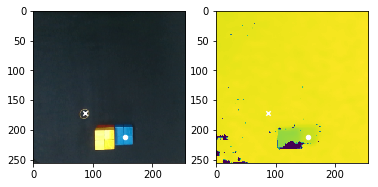

start pixel        goal pixek
x : 154.000000    x : 87.000000
y : 212.000000    y : 172.000000
z : 679.164062    z : 726.554688


start pose        goal pose
x : 0.864916    x : 0.795651
y : 0.065217    y : -0.051751
z : -0.200355    z : -0.193070
x : 0.714409    x : 0.735115
y : -0.685229    y : -0.668145
z : 0.118745    z : 0.071574
w : -0.077330    w : -0.089808


start pix : (154,212,679.1640625) -> goal pix : (87,172,726.5546875)
/home/obin/t2b_dataset/pickandplace/0202/data/0029.dat.gz
pick orientation 1- pass or not : 9
place orienation 1- pass or not : 0


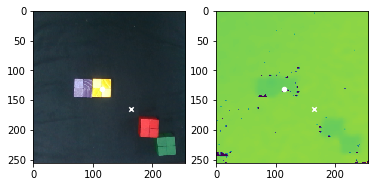

start pixel        goal pixek
x : 115.000000    x : 164.000000
y : 131.000000    y : 165.000000
z : 685.890625    z : 729.835938


start pose        goal pose
x : 0.731292    x : 0.800555
y : -0.009332    y : 0.073916
z : -0.196683    z : -0.192492
x : -0.699782    x : -0.038528
y : 0.713562    y : 0.995841
z : 0.004968    z : 0.015681
w : 0.033317    w : 0.081055


start pix : (115,131,685.890625) -> goal pix : (164,165,729.8359375)
/home/obin/t2b_dataset/pickandplace/data/0121.dat.gz
pick orientation 1- pass or not : 2
place orienation 0- pass or not : 0


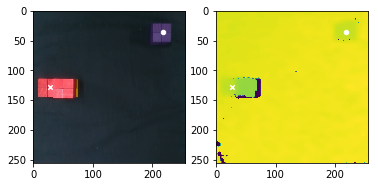

start pixel        goal pixek
x : 218.000000    x : 27.000000
y : 36.000000    y : 128.000000
z : 680.164062    z : 671.952576


start pose        goal pose
x : 0.591389    x : 0.732115
y : 0.163653    y : -0.141085
z : -0.195766    z : -0.141819
x : -0.013781    x : 0.707684
y : 0.991337    y : -0.694458
z : 0.012280    z : -0.059558
w : 0.130039    w : -0.115604


start pix : (218,36,680.1640625) -> goal pix : (27,128,671.952575684)
/home/obin/t2b_dataset/pickandplace/data/0023.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 9


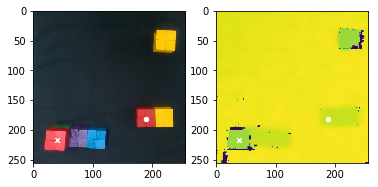

start pixel        goal pixek
x : 189.000000    x : 39.000000
y : 181.000000    y : 217.000000
z : 681.000000    z : 633.000000


start pose        goal pose
x : 0.818615    x : 0.877801
y : 0.115701    y : -0.142721
z : -0.199722    z : -0.087230
x : 0.739115    x : 0.010300
y : -0.660407    y : 0.985091
z : -0.038014    z : -0.052028
w : -0.126992    w : 0.163655


start pix : (189,181,681.0) -> goal pix : (39,217,633.0)
/home/obin/t2b_dataset/pickandplace/data/0039.dat.gz
pick orientation 1- pass or not : 9
place orienation 0- pass or not : 0


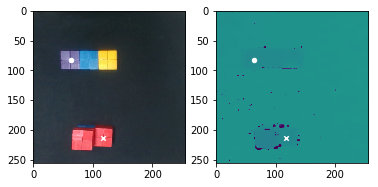

start pixel        goal pixek
x : 63.000000    x : 117.000000
y : 83.000000    y : 214.000000
z : 671.445312    z : 674.000000


start pose        goal pose
x : 0.635121    x : 0.857647
y : -0.099332    y : -0.008508
z : -0.196202    z : -0.145730
x : -0.705880    x : -0.684661
y : 0.708148    y : 0.724833
z : -0.015937    z : -0.048517
w : 0.002576    w : 0.059176


start pix : (63,83,671.4453125) -> goal pix : (117,214,674.0)
/home/obin/t2b_dataset/pickandplace/0202/data/0039.dat.gz
pick orientation 1- pass or not : 2
place orienation 1- pass or not : 2


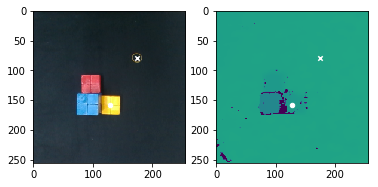

start pixel        goal pixek
x : 128.000000    x : 174.000000
y : 159.000000    y : 79.000000
z : 684.000000    z : 730.000000


start pose        goal pose
x : 0.777084    x : 0.644521
y : -0.002790    y : 0.090073
z : -0.195823    z : -0.190355
x : 0.730311    x : 0.996539
y : -0.651581    y : 0.067728
z : 0.202941    z : 0.048129
w : 0.030037    w : 0.002636


start pix : (128,159,684.0) -> goal pix : (174,79,730.0)
/home/obin/t2b_dataset/pickandplace/0202/data/0028.dat.gz
pick orientation 1- pass or not : 9
place orienation 0- pass or not : 0


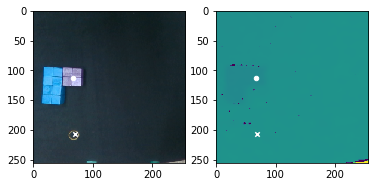

start pixel        goal pixek
x : 67.000000    x : 69.000000
y : 113.000000    y : 207.000000
z : 676.000000    z : 721.000000


start pose        goal pose
x : 0.697394    x : 0.849204
y : -0.101582    y : -0.080814
z : -0.205307    z : -0.200544
x : -0.700634    x : -0.048672
y : 0.713298    y : 0.997404
z : -0.013826    z : -0.016639
w : 0.011300    w : 0.050390


start pix : (67,113,676.0) -> goal pix : (69,207,721.0)
/home/obin/t2b_dataset/pickandplace/0202/data/0025.dat.gz
pick orientation 1- pass or not : 2
place orienation 0- pass or not : 0


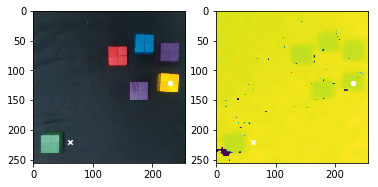

start pixel        goal pixek
x : 230.000000    x : 62.000000
y : 122.000000    y : 220.000000
z : 684.984375    z : 725.726562


start pose        goal pose
x : 0.730244    x : 0.872481
y : 0.183377    y : -0.085024
z : -0.194970    z : -0.190186
x : 0.016717    x : 0.733792
y : 0.990823    y : -0.674996
z : 0.040202    z : -0.004748
w : 0.127964    w : -0.076857


start pix : (230,122,684.984375) -> goal pix : (62,220,725.7265625)
/home/obin/t2b_dataset/pickandplace/data/0102.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 9


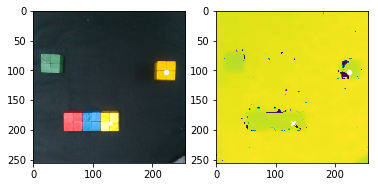

start pixel        goal pixek
x : 223.000000    x : 129.000000
y : 103.000000    y : 188.000000
z : 680.000000    z : 687.000000


start pose        goal pose
x : 0.692938    x : 0.831629
y : 0.177295    y : 0.021887
z : -0.199250    z : -0.138759
x : 0.009293    x : -0.695321
y : 0.991469    y : 0.700450
z : 0.055881    z : 0.104250
w : 0.117391    w : 0.122599


start pix : (223,103,680.0) -> goal pix : (129,188,687.0)
/home/obin/t2b_dataset/pickandplace/data/0125.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


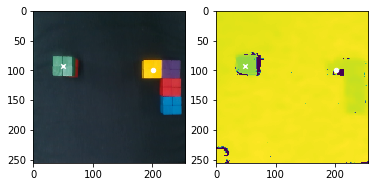

start pixel        goal pixek
x : 201.000000    x : 49.000000
y : 100.000000    y : 93.000000
z : 690.000000    z : 623.023438


start pose        goal pose
x : 0.690143    x : 0.686812
y : 0.139129    y : -0.115674
z : -0.192266    z : -0.082937
x : -0.654981    x : 0.048725
y : 0.749986    y : 0.993584
z : 0.025151    z : -0.050631
w : 0.088823    w : 0.088615


start pix : (201,100,690.0) -> goal pix : (49,93,623.0234375)
/home/obin/t2b_dataset/pickandplace/data/0036.dat.gz
pick orientation 1- pass or not : 2
place orienation 0- pass or not : 9


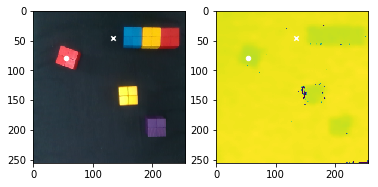

start pixel        goal pixek
x : 54.000000    x : 134.000000
y : 79.000000    y : 45.000000
z : 671.000000    z : 726.000000


start pose        goal pose
x : 0.647660    x : 0.594618
y : -0.108260    y : 0.017522
z : -0.201874    z : -0.190058
x : 0.064614    x : -0.686522
y : 0.992892    y : 0.716736
z : 0.020780    z : -0.042572
w : 0.097771    w : 0.114742


start pix : (54,79,671.0) -> goal pix : (134,45,726.0)
/home/obin/t2b_dataset/pickandplace/data/0029.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


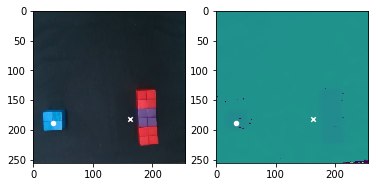

start pixel        goal pixek
x : 33.000000    x : 163.000000
y : 188.000000    y : 182.000000
z : 676.000000    z : 722.398438


start pose        goal pose
x : 0.834568    x : 0.818907
y : -0.152462    y : 0.076002
z : -0.203883    z : -0.203021
x : -0.059489    x : 0.711138
y : 0.981721    y : -0.672993
z : -0.024229    z : -0.114844
w : 0.179160    w : -0.167851


start pix : (33,188,676.0) -> goal pix : (163,182,722.3984375)
/home/obin/t2b_dataset/pickandplace/data/0015.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 9


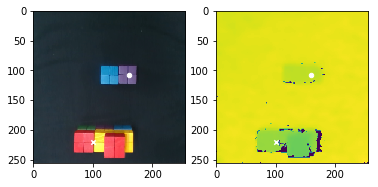

start pixel        goal pixek
x : 160.000000    x : 100.000000
y : 107.000000    y : 221.000000
z : 676.140625    z : 633.000000


start pose        goal pose
x : 0.694253    x : 0.870782
y : 0.051881    y : -0.029285
z : -0.203812    z : -0.094113
x : 0.677168    x : -0.702113
y : 0.724898    y : 0.706183
z : -0.027564    z : 0.010778
w : 0.123316    w : 0.090706


start pix : (160,107,676.140625) -> goal pix : (100,221,633.0)
/home/obin/t2b_dataset/pickandplace/data/0041.dat.gz
pick orientation 1- pass or not : 1
place orienation 1- pass or not : 2


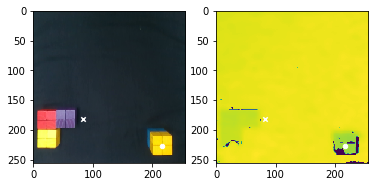

start pixel        goal pixek
x : 216.000000    x : 83.000000
y : 227.000000    y : 181.000000
z : 638.000000    z : 723.445312


start pose        goal pose
x : 0.903887    x : 0.818916
y : 0.155671    y : -0.034489
z : -0.146249    z : -0.188144
x : -0.052814    x : 0.714548
y : 0.962006    y : -0.662251
z : -0.003259    z : -0.139463
w : 0.267851    w : -0.177189


start pix : (216,227,638.0) -> goal pix : (83,181,723.4453125)
/home/obin/t2b_dataset/pickandplace/data/0026.dat.gz
pick orientation 0- pass or not : 9
place orienation 1- pass or not : 9


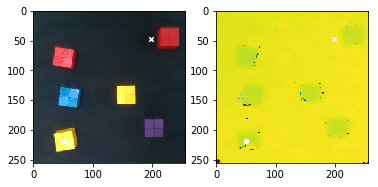

start pixel        goal pixek
x : 50.000000    x : 198.000000
y : 219.000000    y : 47.000000
z : 678.859375    z : 725.000000


start pose        goal pose
x : 0.881097    x : 0.597403
y : -0.112265    y : 0.124919
z : -0.201498    z : -0.186555
x : -0.062815    x : 0.711139
y : 0.994465    y : -0.696627
z : 0.016917    z : -0.019038
w : 0.082504    w : -0.092899


start pix : (50,219,678.859375) -> goal pix : (198,47,725.0)
/home/obin/t2b_dataset/pickandplace/data/0027.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 9


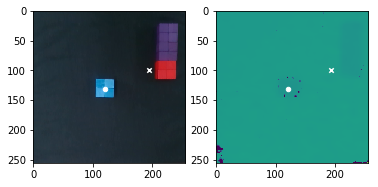

start pixel        goal pixek
x : 121.000000    x : 194.000000
y : 132.000000    y : 100.000000
z : 676.000000    z : 723.000000


start pose        goal pose
x : 0.751150    x : 0.687751
y : -0.017017    y : 0.122170
z : -0.205768    z : -0.192150
x : -0.019681    x : -0.693997
y : 0.987320    y : 0.707227
z : -0.035481    z : 0.063886
w : 0.153469    w : 0.118814


start pix : (121,132,676.0) -> goal pix : (194,100,723.0)
/home/obin/t2b_dataset/pickandplace/data/0016.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


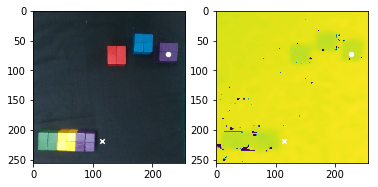

start pixel        goal pixek
x : 227.000000    x : 115.000000
y : 73.000000    y : 218.000000
z : 680.195312    z : 722.945313


start pose        goal pose
x : 0.629933    x : 0.877508
y : 0.191996    y : 0.007535
z : -0.183803    z : -0.178876
x : -0.012708    x : -0.697711
y : 0.996825    y : 0.700942
z : 0.053789    z : -0.015891
w : 0.057320    w : 0.147061


start pix : (227,73,680.1953125) -> goal pix : (115,218,722.9453125)
/home/obin/t2b_dataset/pickandplace/data/0104.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


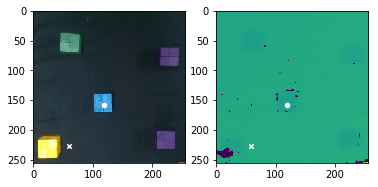

start pixel        goal pixek
x : 119.000000    x : 59.000000
y : 159.000000    y : 227.000000
z : 673.000000    z : 729.820312


start pose        goal pose
x : 0.780328    x : 0.909399
y : -0.004061    y : -0.098765
z : -0.195548    z : -0.189339
x : -0.043378    x : 0.702163
y : 0.997269    y : -0.696622
z : -0.002509    z : 0.022511
w : 0.059716    w : -0.145527


start pix : (119,159,673.0) -> goal pix : (59,227,729.8203125)
/home/obin/t2b_dataset/pickandplace/data/0133.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 9


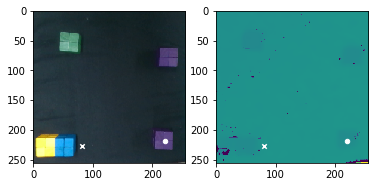

start pixel        goal pixek
x : 221.000000    x : 81.000000
y : 218.000000    y : 227.000000
z : 686.000000    z : 725.195312


start pose        goal pose
x : 0.912107    x : 0.900289
y : 0.166026    y : -0.033926
z : -0.187441    z : -0.182192
x : -0.009613    x : 0.728457
y : 0.957382    y : -0.634453
z : 0.022079    z : -0.090827
w : 0.287819    w : -0.242012


start pix : (221,218,686.0) -> goal pix : (81,227,725.1953125)
/home/obin/t2b_dataset/pickandplace/data/0134.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 9


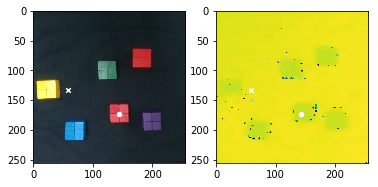

start pixel        goal pixek
x : 143.000000    x : 58.000000
y : 173.000000    y : 133.000000
z : 680.000000    z : 718.328125


start pose        goal pose
x : 0.823349    x : 0.728239
y : 0.032330    y : -0.136735
z : -0.198601    z : -0.192878
x : -0.006669    x : 0.675118
y : 0.986446    y : 0.714807
z : 0.018753    z : -0.110625
w : 0.162875    w : 0.145011


start pix : (143,173,680.0) -> goal pix : (58,133,718.328125)
/home/obin/t2b_dataset/pickandplace/data/0079.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 1


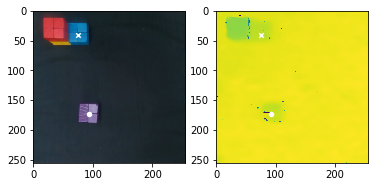

start pixel        goal pixek
x : 93.000000    x : 75.000000
y : 174.000000    y : 40.000000
z : 686.234375    z : 666.000000


start pose        goal pose
x : 0.807550    x : 0.579998
y : -0.051596    y : -0.083900
z : -0.211482    z : -0.150588
x : 0.704200    x : 0.712261
y : -0.703843    y : -0.699017
z : -0.014857    z : -0.010384
w : -0.092121    w : -0.062859


start pix : (93,174,686.234375) -> goal pix : (75,40,666.0)
/home/obin/t2b_dataset/pickandplace/data/0024.dat.gz
pick orientation 0- pass or not : 9
place orienation 1- pass or not : 9


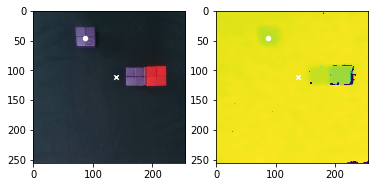

start pixel        goal pixek
x : 87.000000    x : 138.000000
y : 45.000000    y : 111.000000
z : 668.000000    z : 725.000000


start pose        goal pose
x : 0.598693    x : 0.705164
y : -0.063502    y : 0.026915
z : -0.202109    z : -0.192632
x : 0.013701    x : -0.695125
y : 0.998180    y : 0.714539
z : -0.001700    z : 0.051298
w : 0.058704    w : 0.060036


start pix : (87,45,668.0) -> goal pix : (138,111,725.0)
/home/obin/t2b_dataset/pickandplace/data/0017.dat.gz
pick orientation 0- pass or not : 0
place orienation 1- pass or not : 2


In [21]:
## x_array = []
x_ori_array = []
y_array = []
mean_depth = 0
caution = []
# resume = int(input('where do you want to start from? : '))
resume = 0
for i in range(resume, num_data):
    curr_data = joblib.load(os.path.join(pp_path,data_list[i]))
    if curr_data['pick_orientation'] == 0 and curr_data['place_orientation'] == 0 : continue
    plt.figure(i)
    plt.subplot(121)
    plt.imshow(curr_data['image'])
    plt.scatter(curr_data['start_pix'][0], curr_data['start_pix'][1], s=20, c='w', marker='o')
    plt.scatter(curr_data['goal_pix'][0], curr_data['goal_pix'][1], s=20, c='w', marker='x')
    plt.subplot(122)
#     kernel = np.ones((10,10),np.float32)/100
#     dst = cv2.blur(curr_data['depth'],(10,10))
    plt.imshow(curr_data['depth'])
    mean_depth += curr_data['depth'].mean()
    plt.scatter(curr_data['start_pix'][0], curr_data['start_pix'][1], s=20, c='w', marker='o')
    plt.scatter(curr_data['goal_pix'][0], curr_data['goal_pix'][1], s=20, c='w', marker='x')
    plt.show()
    
    sx = curr_data['start_pix'][0]
    sy = curr_data['start_pix'][1]
    sz = curr_data['depth'][sy,sx]
    gx = curr_data['goal_pix'][0]
    gy = curr_data['goal_pix'][1]
    gz = curr_data['depth'][gy,gx]
    
    x = [sx,sy,sz,gx,gy,gz]
    pretty_print_input(x)
    
    pick_p_x = curr_data['pick'][0].x
    pick_p_y = curr_data['pick'][0].y
    pick_p_z = curr_data['pick'][0].z
    
    pick_o_x = curr_data['pick'][1].x
    pick_o_y = curr_data['pick'][1].y
    pick_o_z = curr_data['pick'][1].z
    pick_o_w = curr_data['pick'][1].w
    
    place_p_x = curr_data['place'][0].x
    place_p_y = curr_data['place'][0].y
    place_p_z = curr_data['place'][0].z
    
    place_o_x = curr_data['place'][1].x
    place_o_y = curr_data['place'][1].y
    place_o_z = curr_data['place'][1].z
    place_o_w = curr_data['place'][1].w
    
    y = [pick_p_x,pick_p_y,pick_p_z,pick_o_x,pick_o_y,pick_o_z, pick_o_w, place_p_x,place_p_y,place_p_z,place_o_x,place_o_y,place_o_z,place_o_w]
    pretty_print_out(y)
    print('start pix : ({0},{1},{2}) -> goal pix : ({3},{4},{5})'.format(sx,sy,sz,gx,gy,gz))
    
    print(data_list[i])
    try :
        pr = curr_data['pick_orientation']
        while True:
            key = int(input('pick orientation {0}- pass or not : '.format(pr)))
            if key == 9 : 
                caution.append(data_list[i])
                break
            elif key == 0 or key == 1 or key == 2 :
                curr_data['pick_orientation'] = int(key)
                break
            else : 
                print('wrong!')
                continue

    except :  
        while(True):
            key = int(input('which orientation should I "PICK" this in? horizontal : 0 vertically : 1 - '))
            if key == 0 or key == 1 or key == 2 :
                curr_data['pick_orientation'] = int(key)
                break
            else : 
                print('wrong!')
                continue
    
    so = curr_data['pick_orientation']
    
    
    try :
        while(True):
            pr = curr_data['place_orientation']
            key = int(input('place orienation {0}- pass or not : '.format(pr)))
            if key == 9 : 
                caution.append(data_list[i])
                break
            elif key == 0 or key == 1 or key == 2 :
                curr_data['place_orientation'] = int(key)
                break
            else : 
                print('wrong!')
                continue
        
    except :  
        while(True):
            key = int(input('which orientation should I "PLACE" this in? horizontal : 0 vertically : 1 - '))
            if key == 0 or key == 1 or key == 2:
                curr_data['place_orientation'] = int(key)
                break
            else : 
                print('wrong!')
                continue
    so = curr_data['pick_orientation']
    go = curr_data['place_orientation']
    x_ori = [sx,sy,sz,so,gx,gy,gz,go]
    #pretty_print_input(x_ori,True)
    #pretty_print_out(y)
    
    x_array.append(x)
    x_ori_array.append(x_ori)
    y_array.append(y)
    joblib.dump(curr_data, os.path.join(pp_path,data_list[i]))
    

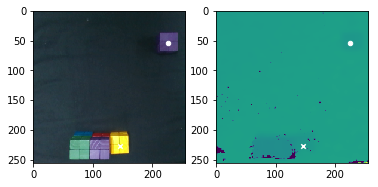

start pixel        goal pixek
x : 226.000000    x : 146.000000
y : 54.000000    y : 227.000000
z : 678.000000    z : 686.000000


start pose        goal pose
x : 0.615535    x : 0.903029
y : 0.176878    y : 0.050378
z : -0.198054    z : -0.131864
x : -0.033317    x : 0.735387
y : 0.997228    y : -0.665216
z : -0.009279    z : 0.039486
w : 0.065884    w : -0.123018


start pix : (226,54,678.0) -> goal pix : (146,227,686.0)
/home/obin/t2b_dataset/pickandplace/temp//0142.dat.gz
pick orientation 0- pass or not : 0
pass!
place orientation 0- pass or not : 1
Flip data
x : -0.033317    x : -0.735387
y : 0.997228    y : 0.665216
z : -0.009279    z : -0.039486
w : 0.065884    w : 0.123018


In [35]:
x_array = []
x_ori_array = []
y_array = []
mean_depth = 0
# resume = int(input('where do you want to start from? : '))
resume = 22
for i in range(resume, resume+1):
    curr_data = joblib.load(os.path.join(pp_path,data_list[i]))
    #if curr_data['pick_orientation'] == 0 and curr_data['place_orientation'] == 0 : continue
    plt.figure(i)
    plt.subplot(121)
    plt.imshow(curr_data['image'])
    plt.scatter(curr_data['start_pix'][0], curr_data['start_pix'][1], s=20, c='w', marker='o')
    plt.scatter(curr_data['goal_pix'][0], curr_data['goal_pix'][1], s=20, c='w', marker='x')
    plt.subplot(122)
#     kernel = np.ones((10,10),np.float32)/100
#     dst = cv2.blur(curr_data['depth'],(10,10))
    plt.imshow(curr_data['depth'])
    mean_depth += curr_data['depth'].mean()
    plt.scatter(curr_data['start_pix'][0], curr_data['start_pix'][1], s=20, c='w', marker='o')
    plt.scatter(curr_data['goal_pix'][0], curr_data['goal_pix'][1], s=20, c='w', marker='x')
    plt.show()
    
    sx = curr_data['start_pix'][0]
    sy = curr_data['start_pix'][1]
    sz = curr_data['depth'][sy,sx]
    gx = curr_data['goal_pix'][0]
    gy = curr_data['goal_pix'][1]
    gz = curr_data['depth'][gy,gx]
    
    
    x = [sx,sy,sz,gx,gy,gz]
    pretty_print_input(x)
    
    pick_p_x = curr_data['pick'][0].x
    pick_p_y = curr_data['pick'][0].y
    pick_p_z = curr_data['pick'][0].z
    
    pick_o_x = curr_data['pick'][1].x
    pick_o_y = curr_data['pick'][1].y
    pick_o_z = curr_data['pick'][1].z
    pick_o_w = curr_data['pick'][1].w
    
    place_p_x = curr_data['place'][0].x
    place_p_y = curr_data['place'][0].y
    place_p_z = curr_data['place'][0].z
    
    place_o_x = curr_data['place'][1].x
    place_o_y = curr_data['place'][1].y
    place_o_z = curr_data['place'][1].z
    place_o_w = curr_data['place'][1].w
    
    y = [pick_p_x,pick_p_y,pick_p_z,pick_o_x,pick_o_y,pick_o_z, pick_o_w, place_p_x,place_p_y,place_p_z,place_o_x,place_o_y,place_o_z,place_o_w]
    pretty_print_out(y)
    print('start pix : ({0},{1},{2}) -> goal pix : ({3},{4},{5})'.format(sx,sy,sz,gx,gy,gz))
    
    print(data_list[i])

    pr = curr_data['pick_orientation']
    while True:
        key = int(input('pick orientation {0}- pass or not : '.format(pr)))
        if key == 1 : 
            curr_data['pick_orientation'] = 2
            print("Flip data")
            curr_data['pick'][1].x = - curr_data['pick'][1].x
            curr_data['pick'][1].y = - curr_data['pick'][1].y
            curr_data['pick'][1].z = - curr_data['pick'][1].z
            curr_data['pick'][1].w = - curr_data['pick'][1].w
            
            print('x : %04f    x : %04f'%(curr_data['pick'][1].x ,curr_data['place'][1].x))
            print('y : %04f    y : %04f'%(curr_data['pick'][1].y,curr_data['place'][1].y))
            print('z : %04f    z : %04f'%(curr_data['pick'][1].z,curr_data['place'][1].z))
            print('w : %04f    w : %04f'%(curr_data['pick'][1].w,curr_data['place'][1].w))
            break
        elif key == 0 :
            print('pass!')
            break
        else : 
            print('wrong!')
            continue

    
    pr = curr_data['place_orientation']
    while True:
        key = int(input('place orientation {0}- pass or not : '.format(pr)))
        if key == 1 : 
            curr_data['place_orientation'] = 2
            print("Flip data")
            curr_data['place'][1].x = - curr_data['place'][1].x
            curr_data['place'][1].y = - curr_data['place'][1].y
            curr_data['place'][1].z = - curr_data['place'][1].z
            curr_data['place'][1].w = - curr_data['place'][1].w
            
            print('x : %04f    x : %04f'%(curr_data['pick'][1].x ,curr_data['place'][1].x))
            print('y : %04f    y : %04f'%(curr_data['pick'][1].y,curr_data['place'][1].y))
            print('z : %04f    z : %04f'%(curr_data['pick'][1].z,curr_data['place'][1].z))
            print('w : %04f    w : %04f'%(curr_data['pick'][1].w,curr_data['place'][1].w))
            break
        elif key == 0 :
            print('pass!')
            break
        else : 
            print('wrong!')
            continue
                  
                  
    so = curr_data['pick_orientation']
    go = curr_data['place_orientation']
    x_ori = [sx,sy,sz,so,gx,gy,gz,go]
    #pretty_print_input(x_ori,True)
    #pretty_print_out(y)
    
    x_array.append(x)
    x_ori_array.append(x_ori)
    y_array.append(y)
    joblib.dump(curr_data, os.path.join(pp_path,data_list[i]))
    

# Data Print

-----------data 0----------


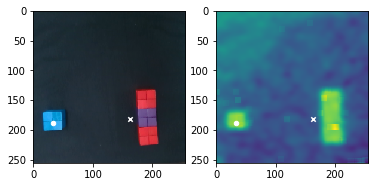

start pix : (33,188,0.494081861515) -> goal pix : (163,182,0.180376814816)
start pixel        goal pixek
x : 33.000000    x : 163.000000
y : 188.000000    y : 182.000000
z : 0.494082    z : 0.180377
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.834568    x : 0.818907
y : -0.152462    y : 0.076002
z : -0.203883    z : -0.203021
x : -0.059489    x : -0.711138
y : 0.981721    y : 0.672993
z : -0.024229    z : 0.114844
w : 0.179160    w : 0.167851


-----------data 1----------


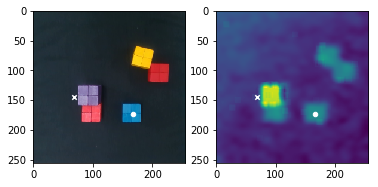

start pix : (167,174,0.48953106816) -> goal pix : (68,144,0.228812922132)
start pixel        goal pixek
x : 167.000000    x : 68.000000
y : 174.000000    y : 144.000000
z : 0.489531    z : 0.228813
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.821324    x : 0.751731
y : 0.076273    y : -0.069301
z : -0.202951    z : -0.194926
x : -0.037850    x : -0.704499
y : 0.984355    y : 0.690126
z : -0.005481    z : 0.093702
w : 0.171997    w : 0.136482


-----------data 2----------


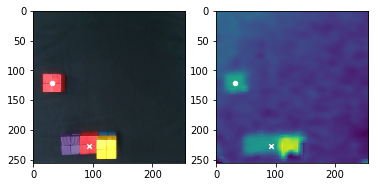

start pix : (31,122,0.498442868091) -> goal pix : (93,228,0.450493654481)
start pixel        goal pixek
x : 31.000000    x : 93.000000
y : 122.000000    y : 228.000000
z : 0.498443    z : 0.450494
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.724972    x : 0.893149
y : -0.154949    y : -0.046129
z : -0.215562    z : -0.157082
x : -0.016945    x : -0.710048
y : 0.992147    y : 0.690310
z : -0.023614    z : 0.001365
w : 0.121655    w : 0.138931


-----------data 3----------


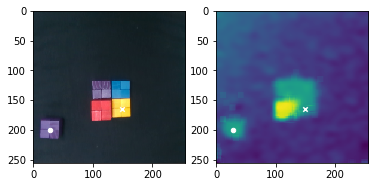

start pix : (28,200,0.496637427864) -> goal pix : (149,165,0.462410394124)
start pixel        goal pixek
x : 28.000000    x : 149.000000
y : 200.000000    y : 165.000000
z : 0.496637    z : 0.462410
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.863013    x : 0.786054
y : -0.152900    y : 0.065957
z : -0.207966    z : -0.153834
x : -0.006984    x : -0.737676
y : 0.982973    y : 0.662113
z : -0.021099    z : 0.071851
w : 0.182399    w : 0.110808


-----------data 4----------


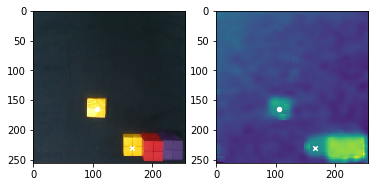

start pix : (106,165,0.477754554751) -> goal pix : (166,231,0.446772463158)
start pixel        goal pixek
x : 106.000000    x : 166.000000
y : 165.000000    y : 231.000000
z : 0.477755    z : 0.446772
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.796517    x : 0.896881
y : -0.027188    y : 0.082341
z : -0.191278    z : -0.128452
x : -0.053403    x : -0.731358
y : 0.986282    y : 0.662117
z : -0.021485    z : 0.009893
w : 0.154706    w : 0.163156


-----------data 5----------


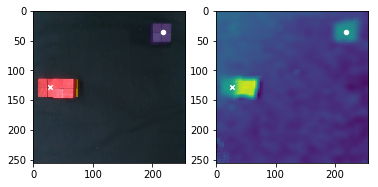

start pix : (218,36,0.463000685452) -> goal pix : (27,128,0.53546849796)
start pixel        goal pixek
x : 218.000000    x : 27.000000
y : 36.000000    y : 128.000000
z : 0.463001    z : 0.535468
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.591389    x : 0.732115
y : 0.163653    y : -0.141085
z : -0.195766    z : -0.141819
x : -0.013781    x : -0.707684
y : 0.991337    y : 0.694458
z : 0.012280    z : 0.059558
w : 0.130039    w : 0.115604


-----------data 6----------


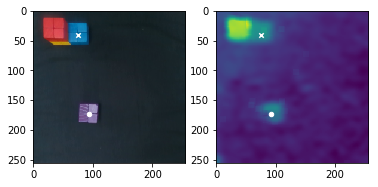

start pix : (93,174,0.428358490588) -> goal pix : (75,40,0.55744139379)
start pixel        goal pixek
x : 93.000000    x : 75.000000
y : 174.000000    y : 40.000000
z : 0.428358    z : 0.557441
o : 2.000000    o : 2.000000


start pose        goal pose
x : 0.807550    x : 0.579998
y : -0.051596    y : -0.083900
z : -0.211482    z : -0.150588
x : -0.704200    x : -0.712261
y : 0.703843    y : 0.699017
z : 0.014857    z : 0.010384
w : 0.092121    w : 0.062859


-----------data 7----------


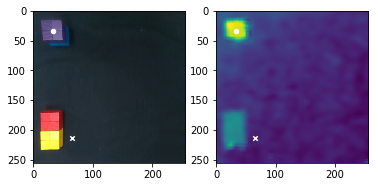

start pix : (33,33,0.8750440641) -> goal pix : (65,213,0.140169784465)
start pixel        goal pixek
x : 33.000000    x : 65.000000
y : 33.000000    y : 213.000000
z : 0.875044    z : 0.140170
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.580937    x : 0.874357
y : -0.137215    y : -0.105462
z : -0.157405    z : -0.192737
x : 0.015792    x : -0.716945
y : 0.998547    y : 0.692031
z : -0.010052    z : -0.035515
w : 0.050527    w : 0.076293


-----------data 8----------


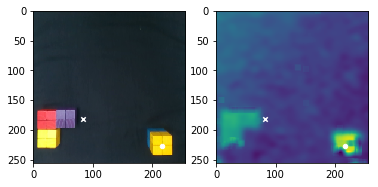

start pix : (216,227,0.704114156625) -> goal pix : (83,181,0.175442297511)
start pixel        goal pixek
x : 216.000000    x : 83.000000
y : 227.000000    y : 181.000000
z : 0.704114    z : 0.175442
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.903887    x : 0.818916
y : 0.155671    y : -0.034489
z : -0.146249    z : -0.188144
x : -0.052814    x : -0.714548
y : 0.962006    y : 0.662251
z : -0.003259    z : 0.139463
w : 0.267851    w : 0.177189


-----------data 9----------


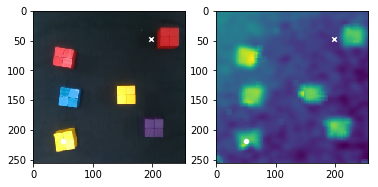

start pix : (50,219,0.482918519479) -> goal pix : (198,47,0.162674654567)
start pixel        goal pixek
x : 50.000000    x : 198.000000
y : 219.000000    y : 47.000000
z : 0.482919    z : 0.162675
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.881097    x : 0.597403
y : -0.112265    y : 0.124919
z : -0.201498    z : -0.186555
x : -0.062815    x : -0.711139
y : 0.994465    y : 0.696627
z : 0.016917    z : 0.019038
w : 0.082504    w : 0.092899


-----------data 10----------


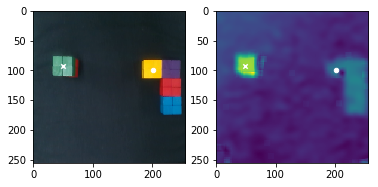

start pix : (201,100,0.391710859571) -> goal pix : (49,93,0.844007521011)
start pixel        goal pixek
x : 201.000000    x : 49.000000
y : 100.000000    y : 93.000000
z : 0.391711    z : 0.844008
o : 2.000000    o : 0.000000


start pose        goal pose
x : 0.690143    x : 0.686812
y : 0.139129    y : -0.115674
z : -0.192266    z : -0.082937
x : -0.654981    x : 0.048725
y : 0.749986    y : 0.993584
z : 0.025151    z : -0.050631
w : 0.088823    w : 0.088615


-----------data 11----------


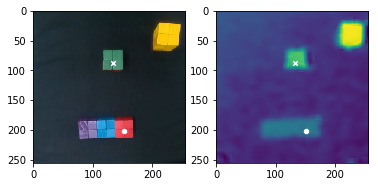

start pix : (152,202,0.453499416133) -> goal pix : (133,87,0.822782073895)
start pixel        goal pixek
x : 152.000000    x : 133.000000
y : 202.000000    y : 87.000000
z : 0.453499    z : 0.822782
o : 2.000000    o : 0.000000


start pose        goal pose
x : 0.863589    x : 0.667652
y : 0.048685    y : 0.012083
z : -0.199494    z : -0.089874
x : -0.717629    x : 0.019214
y : 0.686649    y : 0.991784
z : -0.037138    z : -0.059260
w : 0.110192    w : 0.111727


-----------data 12----------


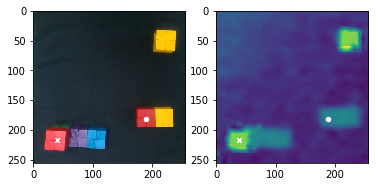

start pix : (189,181,0.453676865673) -> goal pix : (39,217,0.781055614052)
start pixel        goal pixek
x : 189.000000    x : 39.000000
y : 181.000000    y : 217.000000
z : 0.453677    z : 0.781056
o : 2.000000    o : 0.000000


start pose        goal pose
x : 0.818615    x : 0.877801
y : 0.115701    y : -0.142721
z : -0.199722    z : -0.087230
x : -0.739115    x : 0.010300
y : 0.660407    y : 0.985091
z : 0.038014    z : -0.052028
w : 0.126992    w : 0.163655


-----------data 13----------


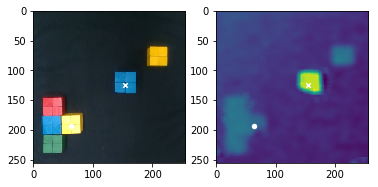

start pix : (63,193,0.445025779441) -> goal pix : (154,125,1.14725790893)
start pixel        goal pixek
x : 63.000000    x : 154.000000
y : 193.000000    y : 125.000000
z : 0.445026    z : 1.147258
o : 2.000000    o : 0.000000


start pose        goal pose
x : 0.843169    x : 0.730905
y : -0.093302    y : 0.047215
z : -0.194525    z : -0.037717
x : -0.728686    x : 0.010015
y : 0.677066    y : 0.995165
z : 0.007405    z : -0.041275
w : 0.102683    w : 0.088556


-----------data 14----------


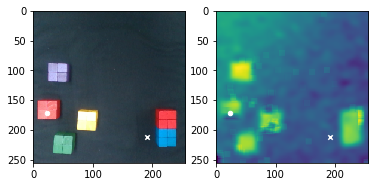

start pix : (23,171,0.416279250949) -> goal pix : (191,212,0.154740348918)
start pixel        goal pixek
x : 23.000000    x : 191.000000
y : 171.000000    y : 212.000000
z : 0.416279    z : 0.154740
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.798591    x : 0.882886
y : -0.155507    y : 0.133524
z : -0.195085    z : -0.178428
x : 0.000537    x : -0.719476
y : 0.990818    y : 0.659208
z : -0.026791    z : 0.003892
w : 0.132523    w : 0.218597


-----------data 15----------


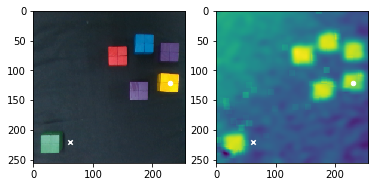

start pix : (230,122,0.439082749789) -> goal pix : (62,220,0.159556063328)
start pixel        goal pixek
x : 230.000000    x : 62.000000
y : 122.000000    y : 220.000000
z : 0.439083    z : 0.159556
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.730244    x : 0.872481
y : 0.183377    y : -0.085024
z : -0.194970    z : -0.190186
x : 0.016717    x : -0.733792
y : 0.990823    y : 0.674996
z : 0.040202    z : 0.004748
w : 0.127964    w : 0.076857


-----------data 16----------


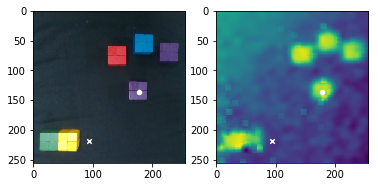

start pix : (178,136,0.470820078181) -> goal pix : (94,218,0.134956084223)
start pixel        goal pixek
x : 178.000000    x : 94.000000
y : 136.000000    y : 218.000000
z : 0.470820    z : 0.134956
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.743209    x : 0.880500
y : 0.103332    y : -0.034562
z : -0.193641    z : -0.188766
x : -0.020832    x : -0.716050
y : 0.993771    y : 0.682375
z : 0.039489    z : 0.021175
w : 0.102103    w : 0.145562


-----------data 17----------


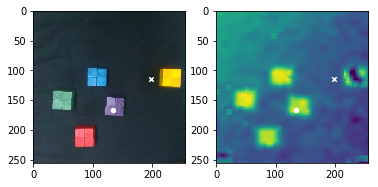

start pix : (134,166,0.481794789036) -> goal pix : (198,115,0.143597583867)
start pixel        goal pixek
x : 134.000000    x : 198.000000
y : 166.000000    y : 115.000000
z : 0.481795    z : 0.143598
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.794985    x : 0.708973
y : 0.031484    y : 0.142986
z : -0.198870    z : -0.179039
x : 0.030533    x : -0.705814
y : 0.992300    y : 0.703236
z : 0.009583    z : 0.054876
w : 0.119655    w : 0.065383


-----------data 18----------


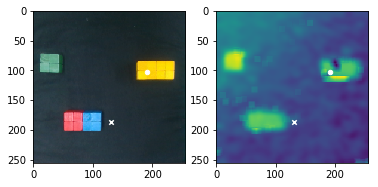

start pix : (191,102,0.448433998766) -> goal pix : (131,187,0.202042923544)
start pixel        goal pixek
x : 191.000000    x : 131.000000
y : 102.000000    y : 187.000000
z : 0.448434    z : 0.202043
o : 2.000000    o : 2.000000


start pose        goal pose
x : 0.685486    x : 0.834283
y : 0.125486    y : 0.019552
z : -0.191910    z : -0.190523
x : -0.705948    x : -0.713751
y : 0.704154    y : 0.693040
z : 0.014528    z : 0.005208
w : 0.074790    w : 0.101138


-----------data 19----------


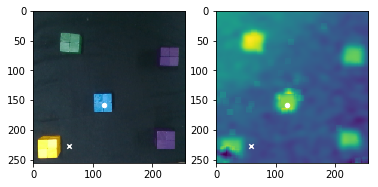

start pix : (119,159,0.506275240963) -> goal pix : (59,227,0.148640910577)
start pixel        goal pixek
x : 119.000000    x : 59.000000
y : 159.000000    y : 227.000000
z : 0.506275    z : 0.148641
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.780328    x : 0.909399
y : -0.004061    y : -0.098765
z : -0.195548    z : -0.189339
x : -0.043378    x : -0.702163
y : 0.997269    y : 0.696622
z : -0.002509    z : -0.022511
w : 0.059716    w : 0.145527


-----------data 20----------


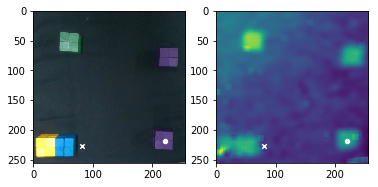

start pix : (221,218,0.42323128123) -> goal pix : (81,227,0.161076444967)
start pixel        goal pixek
x : 221.000000    x : 81.000000
y : 218.000000    y : 227.000000
z : 0.423231    z : 0.161076
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.912107    x : 0.900289
y : 0.166026    y : -0.033926
z : -0.187441    z : -0.182192
x : -0.009613    x : -0.728457
y : 0.957382    y : 0.634453
z : 0.022079    z : 0.090827
w : 0.287819    w : 0.242012


-----------data 21----------


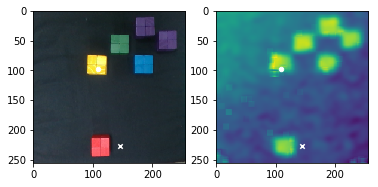

start pix : (109,98,0.388456697046) -> goal pix : (145,228,0.131325542312)
start pixel        goal pixek
x : 109.000000    x : 145.000000
y : 98.000000    y : 228.000000
z : 0.388457    z : 0.131326
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.676514    x : 0.900601
y : -0.015641    y : 0.052155
z : -0.194028    z : -0.184364
x : -0.007130    x : -0.708846
y : 0.998345    y : 0.687053
z : 0.024555    z : -0.039022
w : 0.051520    w : 0.154833


-----------data 22----------


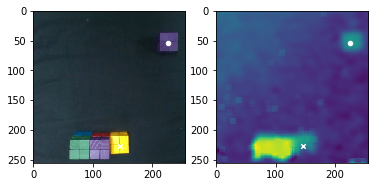

start pix : (226,54,0.475671164498) -> goal pix : (146,227,0.428151886589)
start pixel        goal pixek
x : 226.000000    x : 146.000000
y : 54.000000    y : 227.000000
z : 0.475671    z : 0.428152
o : 0.000000    o : 0.000000


start pose        goal pose
x : 0.615535    x : 0.903029
y : 0.176878    y : 0.050378
z : -0.198054    z : -0.131864
x : -0.033317    x : 0.735387
y : 0.997228    y : -0.665216
z : -0.009279    z : 0.039486
w : 0.065884    w : -0.123018


-----------data 23----------


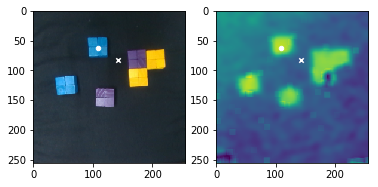

start pix : (109,63,0.526701135688) -> goal pix : (142,83,0.168311177879)
start pixel        goal pixek
x : 109.000000    x : 142.000000
y : 63.000000    y : 83.000000
z : 0.526701    z : 0.168311
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.616544    x : 0.664093
y : -0.032993    y : 0.029498
z : -0.194323    z : -0.190290
x : -0.043258    x : -0.718257
y : 0.997387    y : 0.684651
z : -0.010148    z : -0.054418
w : 0.056973    w : 0.111346


-----------data 24----------


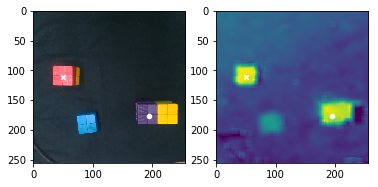

start pix : (195,177,0.790776296615) -> goal pix : (50,112,0.843245615104)
start pixel        goal pixek
x : 195.000000    x : 50.000000
y : 177.000000    y : 112.000000
z : 0.790776    z : 0.843246
o : 2.000000    o : 0.000000


start pose        goal pose
x : 0.822088    x : 0.714833
y : 0.106854    y : -0.115775
z : -0.164396    z : -0.108467
x : -0.720398    x : 0.021236
y : 0.686759    y : 0.998630
z : -0.013195    z : -0.017698
w : 0.095994    w : 0.044434


-----------data 25----------


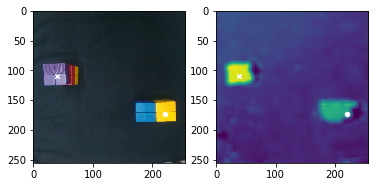

start pix : (221,173,0.761023530353) -> goal pix : (39,110,1.19641400321)
start pixel        goal pixek
x : 221.000000    x : 39.000000
y : 173.000000    y : 110.000000
z : 0.761024    z : 1.196414
o : 2.000000    o : 0.000000


start pose        goal pose
x : 0.820672    x : 0.716168
y : 0.154367    y : -0.124017
z : -0.158024    z : -0.053951
x : -0.715560    x : -0.005434
y : 0.687435    y : 0.994573
z : 0.008312    z : -0.048799
w : 0.123845    w : 0.091727


-----------data 26----------


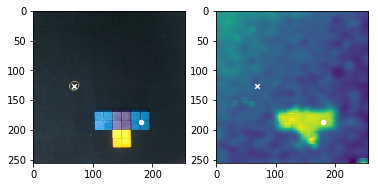

start pix : (180,187,0.457350282746) -> goal pix : (68,126,0.162354651319)
start pixel        goal pixek
x : 180.000000    x : 68.000000
y : 187.000000    y : 126.000000
z : 0.457350    z : 0.162355
o : 2.000000    o : 0.000000


start pose        goal pose
x : 0.821805    x : 0.711337
y : 0.109138    y : -0.096601
z : -0.212487    z : -0.205894
x : -0.714374    x : -0.039049
y : 0.691171    y : 0.997055
z : 0.013748    z : -0.022471
w : 0.108459    w : 0.062067


-----------data 27----------


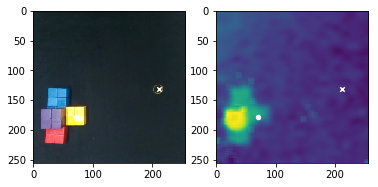

start pix : (71,178,0.479385011258) -> goal pix : (211,131,0.147093543262)
start pixel        goal pixek
x : 71.000000    x : 211.000000
y : 178.000000    y : 131.000000
z : 0.479385    z : 0.147094
o : 2.000000    o : 2.000000


start pose        goal pose
x : 0.796795    x : 0.721449
y : -0.080640    y : 0.154136
z : -0.205382    z : -0.202106
x : -0.706776    x : -0.688356
y : 0.706697    y : 0.722047
z : 0.003716    z : 0.051539
w : 0.032134    w : 0.046457


-----------data 28----------


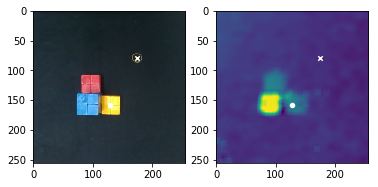

start pix : (128,159,0.454935382084) -> goal pix : (174,79,0.142024512613)
start pixel        goal pixek
x : 128.000000    x : 174.000000
y : 159.000000    y : 79.000000
z : 0.454935    z : 0.142025
o : 2.000000    o : 0.000000


start pose        goal pose
x : 0.777084    x : 0.644521
y : -0.002790    y : 0.090073
z : -0.195823    z : -0.190355
x : -0.730311    x : 0.996539
y : 0.651581    y : 0.067728
z : -0.202941    z : 0.048129
w : -0.030037    w : 0.002636


-----------data 29----------


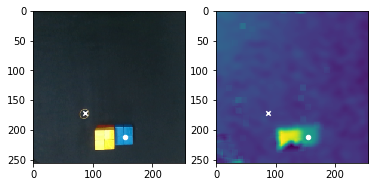

start pix : (154,212,0.472793556327) -> goal pix : (87,172,0.159092285669)
start pixel        goal pixek
x : 154.000000    x : 87.000000
y : 212.000000    y : 172.000000
z : 0.472794    z : 0.159092
o : 2.000000    o : 2.000000


start pose        goal pose
x : 0.864916    x : 0.795651
y : 0.065217    y : -0.051751
z : -0.200355    z : -0.193070
x : -0.714409    x : -0.735115
y : 0.685229    y : 0.668145
z : -0.118745    z : -0.071574
w : 0.077330    w : 0.089808


-----------data 30----------


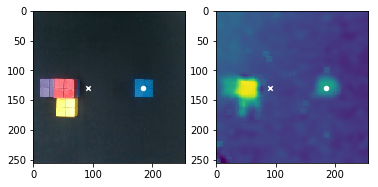

start pix : (185,130,0.482657712194) -> goal pix : (91,130,0.184693990012)
start pixel        goal pixek
x : 185.000000    x : 91.000000
y : 130.000000    y : 130.000000
z : 0.482658    z : 0.184694
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.729793    x : 0.718626
y : 0.120694    y : -0.036009
z : -0.204334    z : -0.181660
x : -0.004238    x : -0.715078
y : 0.992858    y : 0.689720
z : -0.002570    z : 0.088120
w : 0.119196    w : 0.072010


-----------data 31----------


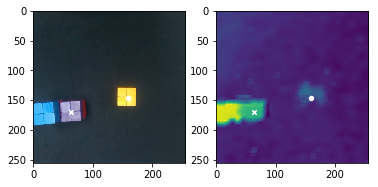

start pix : (159,147,0.294082427509) -> goal pix : (63,170,0.802984849402)
start pixel        goal pixek
x : 159.000000    x : 63.000000
y : 147.000000    y : 170.000000
z : 0.294082    z : 0.802985
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.759816    x : 0.772650
y : 0.052225    y : -0.081221
z : -0.206643    z : -0.106008
x : -0.015734    x : -0.745193
y : 0.992531    y : 0.660364
z : -0.019955    z : 0.066066
w : 0.119318    w : 0.065129


-----------data 32----------


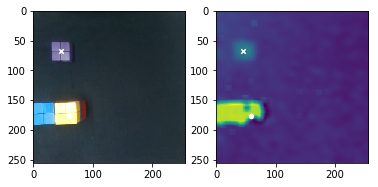

start pix : (59,176,0.995120603571) -> goal pix : (46,68,0.51425942861)
start pixel        goal pixek
x : 59.000000    x : 46.000000
y : 176.000000    y : 68.000000
z : 0.995121    z : 0.514259
o : 2.000000    o : 0.000000


start pose        goal pose
x : 0.768745    x : 0.607389
y : -0.096170    y : -0.133553
z : -0.108737    z : -0.158228
x : -0.734574    x : 0.017946
y : 0.678465    y : 0.999659
z : 0.007363    z : -0.017957
w : 0.005687    w : 0.006094


-----------data 33----------


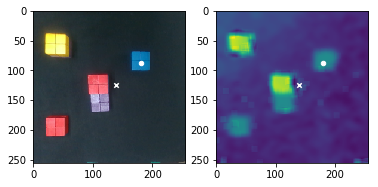

start pix : (180,88,0.491506869711) -> goal pix : (139,124,0.263428920707)
start pixel        goal pixek
x : 180.000000    x : 139.000000
y : 88.000000    y : 124.000000
z : 0.491507    z : 0.263429
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.666269    x : 0.707669
y : 0.095766    y : 0.036386
z : -0.203526    z : -0.211440
x : -0.018277    x : -0.708309
y : 0.996762    y : 0.704450
z : -0.014786    z : -0.026868
w : 0.076890    w : 0.036432


-----------data 34----------


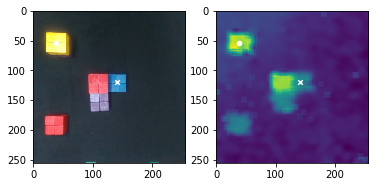

start pix : (38,54,0.867884534638) -> goal pix : (141,120,0.499614454165)
start pixel        goal pixek
x : 38.000000    x : 141.000000
y : 54.000000    y : 120.000000
z : 0.867885    z : 0.499614
o : 0.000000    o : 2.000000


start pose        goal pose
x : 0.626248    x : 0.717038
y : -0.127321    y : 0.039322
z : -0.153293    z : -0.145686
x : 0.018193    x : -0.712673
y : 0.995977    y : 0.699641
z : -0.035781    z : 0.012066
w : 0.080114    w : 0.049542




In [29]:
x_array = []
x_ori_array = []
y_array = []
mean_depth = 0
# resume = int(input('where do you want to start from? : '))
resume = 0
for i in range(resume, num_data):
    curr_data = joblib.load(os.path.join(pp_path,data_list[i]))
    print('-----------data {0}----------'.format(i))
    plt.figure(i)
    plt.subplot(121)
    plt.imshow(curr_data['image'])
    plt.scatter(curr_data['start_pix'][0], curr_data['start_pix'][1], s=20, c='w', marker='o')
    plt.scatter(curr_data['goal_pix'][0], curr_data['goal_pix'][1], s=20, c='w', marker='x')
    plt.subplot(122)
    
    curr_data['depth']  = (750 - curr_data['depth'])/750
    curr_data['depth'][np.where(curr_data['depth'] >= 0.5)] = 0
    curr_data['depth'][np.where(curr_data['depth'] < 0)] = 0
    curr_data['depth'] = curr_data['depth']*5
    
    
    kernel = np.ones((10,10),np.float32)/100
    curr_data['depth'] = cv2.filter2D(curr_data['depth'],-1,kernel)
#     curr_data['depth'] = denoise_tv_chambolle(curr_data['depth'],weight=0.25, multichannel=False)
    plt.imshow(curr_data['depth'])
    plt.scatter(curr_data['start_pix'][0], curr_data['start_pix'][1], s=20, c='w', marker='o')
    plt.scatter(curr_data['goal_pix'][0], curr_data['goal_pix'][1], s=20, c='w', marker='x')
    plt.show()
    
    sx = curr_data['start_pix'][0]
    sy = curr_data['start_pix'][1]
    sz = curr_data['depth'][sy,sx]
    gx = curr_data['goal_pix'][0]
    gy = curr_data['goal_pix'][1]
    gz = curr_data['depth'][gy,gx]
    
    x = [sx,sy,sz,gx,gy,gz]
    
    pick_p_x = curr_data['pick'][0].x
    pick_p_y = curr_data['pick'][0].y
    pick_p_z = curr_data['pick'][0].z
    
    pick_o_x = curr_data['pick'][1].x
    pick_o_y = curr_data['pick'][1].y
    pick_o_z = curr_data['pick'][1].z
    pick_o_w = curr_data['pick'][1].w
    
    place_p_x = curr_data['place'][0].x
    place_p_y = curr_data['place'][0].y
    place_p_z = curr_data['place'][0].z
    
    place_o_x = curr_data['place'][1].x
    place_o_y = curr_data['place'][1].y
    place_o_z = curr_data['place'][1].z
    place_o_w = curr_data['place'][1].w
    
    y = [pick_p_x,pick_p_y,pick_p_z,pick_o_x,pick_o_y,pick_o_z, pick_o_w, 
         place_p_x,place_p_y,place_p_z,place_o_x,place_o_y,place_o_z,place_o_w]

    print('start pix : ({0},{1},{2}) -> goal pix : ({3},{4},{5})'.format(sx,sy,sz,gx,gy,gz))
    
    so = curr_data['pick_orientation']
    go = curr_data['place_orientation']
    x_ori = [sx,sy,sz,so,gx,gy,gz,go]
    pretty_print_input(x_ori,True)
    pretty_print_out(y)
    
    x_array.append(x)
    x_ori_array.append(x_ori)
    y_array.append(y)
#     joblib.dump(curr_data, os.path.join(pp_path,data_list[i]))
    

# Miscellaneous

In [42]:
curr_data['pick'][0].x = 0.762535
curr_data['pick'][0].y = -0.087674
curr_data['pick'][0].z = -0.201498
curr_data['pick'][1].x = -0.02277
curr_data['pick'][1].y = 0.9879628
curr_data['pick'][1].z = -0.01236
curr_data['pick'][1].w = 0.1152506

In [46]:
curr_data['pick']

array([x: 0.762535
y: -0.087674
z: -0.201498,
       x: -0.06419
y: 0.9922
z: 0.01109
w: 0.1061], dtype=object)

In [47]:
curr_data['place']

array([x: 0.575177589618
y: -0.154834575671
z: -0.190609372398,
       x: -0.0382716673866
y: 0.996928004013
z: -0.0131648373439
w: 0.0670561059694], dtype=object)

In [44]:
joblib.dump(curr_data, os.path.join(pp_path,'/home/obin/t2b_dataset/pickandplace/data/0075.dat.gz'))

['/home/obin/t2b_dataset/pickandplace/data/0075.dat.gz']